In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
%matplotlib inline

In [33]:
df= pd.read_csv(r"C:\Users\2479i\Downloads\archive (17)\loan-train.csv")

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.shape

(614, 13)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

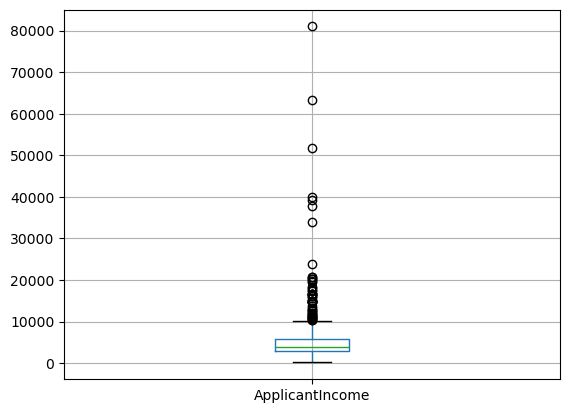

In [41]:
df.boxplot(column='ApplicantIncome')

<Axes: >

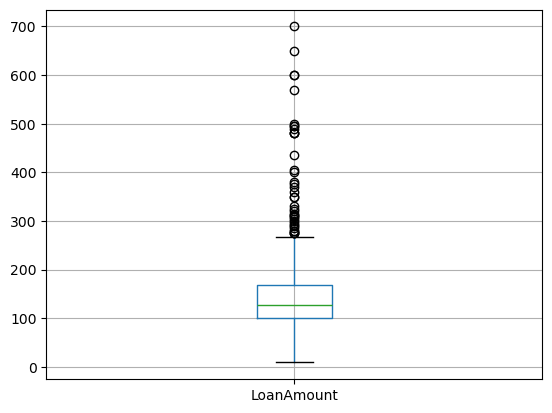

In [40]:
df.boxplot(column='LoanAmount')

(array([353., 180.,  44.,  15.,  12.,   3.,   0.,   0.,   1.,   3.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  150. ,  4192.5,  8235. , 12277.5, 16320. , 20362.5, 24405. ,
        28447.5, 32490. , 36532.5, 40575. , 44617.5, 48660. , 52702.5,
        56745. , 60787.5, 64830. , 68872.5, 72915. , 76957.5, 81000. ]),
 <BarContainer object of 20 artists>)

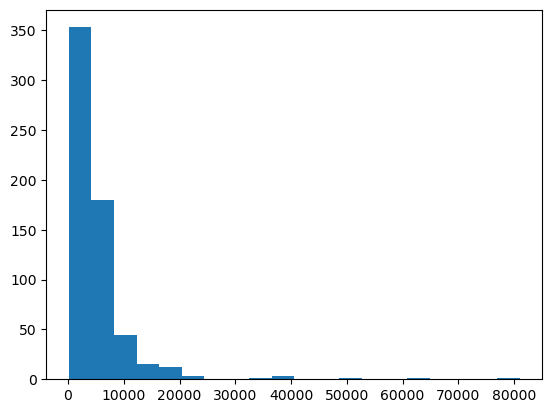

In [44]:
plt.hist(df['ApplicantIncome'],bins = 20)

(array([434., 127.,  36.,  10.,   1.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([    0.  ,  2083.35,  4166.7 ,  6250.05,  8333.4 , 10416.75,
        12500.1 , 14583.45, 16666.8 , 18750.15, 20833.5 , 22916.85,
        25000.2 , 27083.55, 29166.9 , 31250.25, 33333.6 , 35416.95,
        37500.3 , 39583.65, 41667.  ]),
 <BarContainer object of 20 artists>)

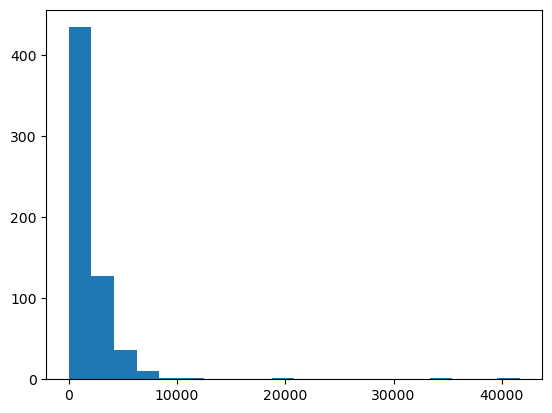

In [45]:
plt.hist(df['CoapplicantIncome'],bins = 20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

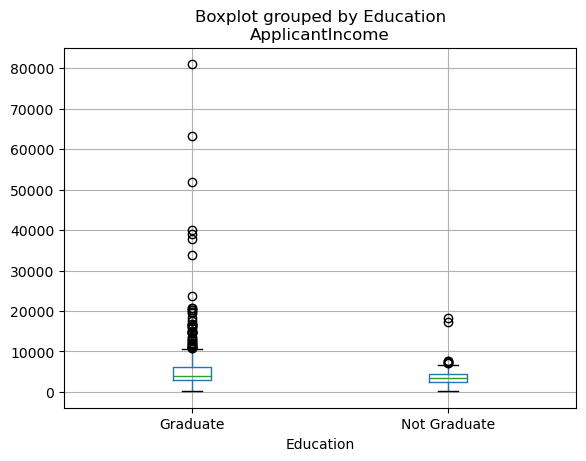

In [47]:
df.boxplot(column = 'ApplicantIncome',by = 'Education')

<Axes: >

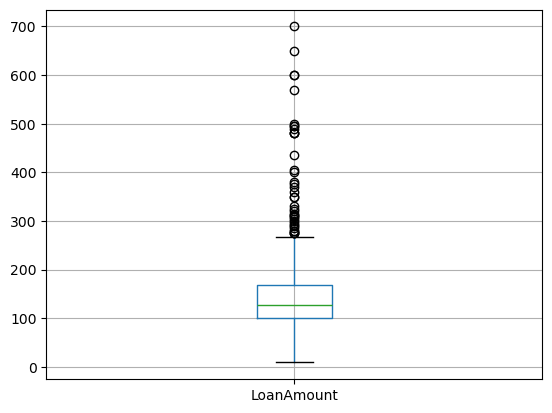

In [50]:
df.boxplot(column = 'LoanAmount')

(array([ 12.,  60., 142., 168.,  90.,  53.,  15.,  18.,  10.,   5.,   4.,
          2.,   1.,   4.,   3.,   0.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <BarContainer object of 20 artists>)

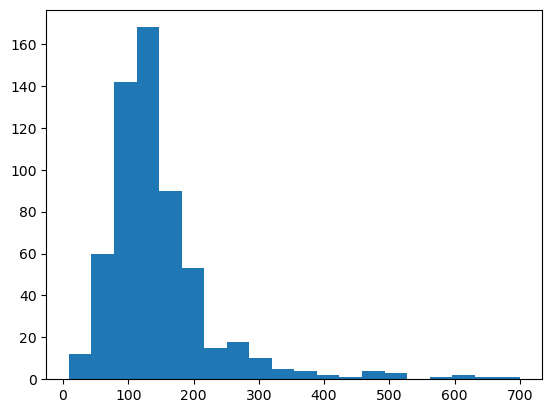

In [51]:
plt.hist(df['LoanAmount'],bins = 20)

In [52]:
# Normalizing the LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

(array([  1.,   0.,   1.,   0.,   3.,   2.,   4.,  12.,  17.,  32.,  63.,
        137., 129.,  99.,  32.,  29.,  13.,   6.,   7.,   5.]),
 array([2.19722458, 2.41491737, 2.63261015, 2.85030294, 3.06799573,
        3.28568852, 3.5033813 , 3.72107409, 3.93876688, 4.15645967,
        4.37415246, 4.59184524, 4.80953803, 5.02723082, 5.24492361,
        5.4626164 , 5.68030918, 5.89800197, 6.11569476, 6.33338755,
        6.55108034]),
 <BarContainer object of 20 artists>)

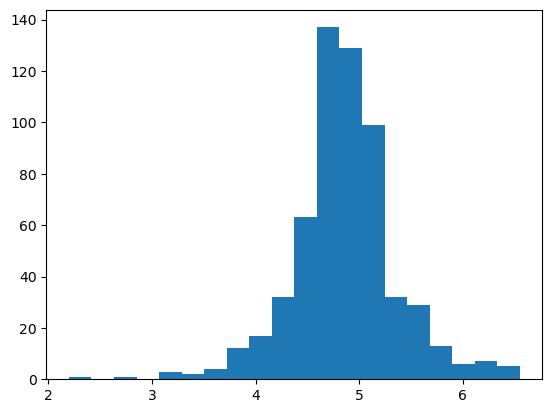

In [55]:
plt.hist(df['LoanAmount_log'],bins = 20)

In [57]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [58]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [60]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [62]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [63]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [64]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [66]:
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)

In [67]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [69]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)


In [70]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [72]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']

<Axes: >

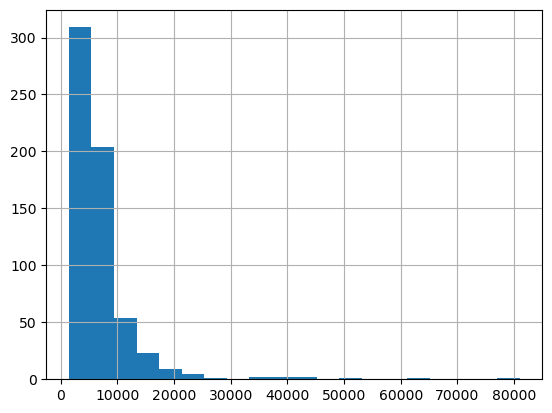

In [73]:
df['TotalIncome'].hist(bins=20)

In [128]:
X = df.iloc[:, np.r_[:5, 9:11]].values


In [129]:
y = df.iloc[:,12].values

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
label_encoder = LabelEncoder()

In [132]:
for i in range(0,5):
    X[:,i]= label_encoder.fit_transform(X[:,i])


In [136]:
X[:,6] = label_encoder.fit_transform(X[:,6])

In [137]:
y = label_encoder.fit_transform(y)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
scaler.fit_transform(X_train)

array([[-0.3871268 ,  0.49162165,  0.77811872, ...,  1.91584304,
         0.31234655,  0.48482997],
       [ 0.47018554,  0.49162165,  0.77811872, ...,  1.91584304,
        -2.32367878,  0.48482997],
       [-0.00737771, -2.03408456, -1.28515093, ..., -0.52196343,
         0.31234655,  0.48482997],
       ...,
       [-0.23752868, -2.03408456, -1.28515093, ..., -0.52196343,
         0.31234655,  0.48482997],
       [ 0.71184406, -2.03408456,  0.77811872, ..., -0.52196343,
        -1.44500367,  0.48482997],
       [-1.20416273,  0.49162165,  0.77811872, ..., -0.52196343,
         0.31234655,  0.48482997]])

In [143]:
scaler.fit_transform(X_test)

array([[ 0.28958909,  0.43259046,  0.63245553, ..., -0.54128886,
         0.2054329 ,  0.57027853],
       [ 0.43661   ,  0.43259046,  0.63245553, ..., -0.54128886,
         0.2054329 , -0.73046913],
       [-0.72866687,  0.43259046,  0.63245553, ..., -0.54128886,
         0.2054329 ,  0.57027853],
       ...,
       [ 1.72168169, -2.31165525, -1.58113883, ..., -0.54128886,
         0.2054329 , -2.0312168 ],
       [ 1.07914585, -2.31165525,  0.63245553, ..., -0.54128886,
        -4.82956031,  0.57027853],
       [ 0.83955621,  0.43259046,  0.63245553, ...,  1.84744242,
        -0.88913084, -0.73046913]])

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt = DecisionTreeClassifier()

In [146]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [147]:
predicted = dt.predict(X_test)

In [148]:
from sklearn import metrics

In [149]:
print("The Accuracy Score for Decision Tree is :", metrics.accuracy_score(predicted,y_test))

The Accuracy Score for Decision Tree is : 0.6502463054187192


In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
NBClassifier = GaussianNB()

In [152]:
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [154]:
y_pred = NBClassifier.predict(X_test)

In [156]:
print("The Accuracy Score for Naive bayes is:",metrics.accuracy_score(y_pred,y_test))

The Accuracy Score for Naive bayes is: 0.7684729064039408
